<a href="https://colab.research.google.com/github/noahrychener/DSF-DCBP-NR/blob/main/Task_2_Noah_Rychener.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Based on the lecture: Data Science Fundamentals for DCBP, S. Haug, University of Bern 

# Coding Task 2 -  Noah Rychener - 19-116-532

- Deadline (upload to Ilias): 2022-05-15 24:00
- Solutions in lecture on 2022-05-18
- Estimated effort: from 4 to 60 hours
- Images (data) on Ilias in the Data folder, the images.zip file
- Main notebook is number 11 for this task, however, also others may help you. You can also benefit a lot from googeling for code examples


## Subtasks (maximum 12.5 points)

- Upload the images to a folder on your google drive. Write a function which retrieves the filenames of the images, contains a loop converting them to png images and saves them. [about 1 hour] [max 3 points] 
- With some filtering and sthresholding, write a function which converts the colored bins into nice white segments on a black background for one image. [about 1 hour][max 3 points]
- Write an algorithm which counts the number of bins. First approach could be a "sliding window" algorithm, i.e a loop sliding over the image and counting regions with substantial white content. There may also be nice segmentation tools out "there" already. You may google. [about 4 hours][max 3 points] 
- Write an algorithm which does the latter task on all images. As the images are quite different, this is a large task which goes beyond the time budget of this exercise, however, you can give it a try. If it works out for a couple of images, that is already good. [from 4 to 50 hours][max 3.5 points]

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
# from skimage.external.tifffile import TiffFile
import skimage.filters as skf
import skimage.morphology as skm
import os
import cv2

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
!pip install pillow_heif 

#### 1. Upload the images to a folder on your google drive. Write a function which retrieves the filenames of the images, contains a loop converting them to png images and saves them. [about 1 hour] [max 3 points]

In [ ]:
# Converting the images in the directory 'path' to .png while retriving the original filename.
from PIL import Image
import pillow_heif

path = '/content/drive/MyDrive/Colab_Notebooks/Coding_Task_2/'

# defining 'image' similarely as done in the corresponding lecture notes.
image = Image.frombytes(heif_file.mode,heif_file.size,heif_file.data,"raw",)

# manipulation of the filenames with subsequent saving as actual '.png' files.
i = 5379
for filename in os.listdir(path):
    os.rename(os.path.join(path,filename), os.path.join(path,'IMG_'+str(i)+'.png'))
    image.save(path+'IMG_'+str(i)+'.png', format="png")
    i = i + 1
    print(os.path.join(path,filename))

Somehow I did run into the problem that my code did overwrite all the pictures with the contents of only a single picture while still retriving the original filenames. I could not figure out why, as it was possible to work with the same loop-logic when renameing. I will just continue with that one single picture to try on doning the next two tasks, as it was not possible for me to resolve the issue on time.

#### 2. With some filtering and sthresholding, write a function which converts the colored bins into nice white segments on a black background for one image. [about 1 hour][max 3 points]

(4032, 3024, 3) (4032, 3024)
(4032, 3024, 3) (4032, 3024)
(4032, 3024, 3) (4032, 3024)
(4032, 3024, 3) (4032, 3024)
(4032, 3024, 3) (4032, 3024)
(4032, 3024, 3) (4032, 3024)
(4032, 3024, 3) (4032, 3024)
(4032, 3024, 3) (4032, 3024)
(4032, 3024, 3) (4032, 3024)
(4032, 3024, 3) (4032, 3024)
(4032, 3024, 3) (4032, 3024)
(4032, 3024, 3) (4032, 3024)
(4032, 3024, 3) (4032, 3024)
(4032, 3024, 3) (4032, 3024)
(4032, 3024, 3) (4032, 3024)


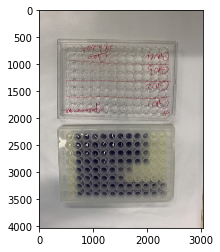

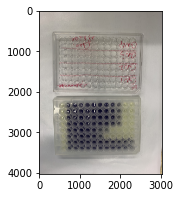

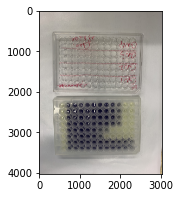

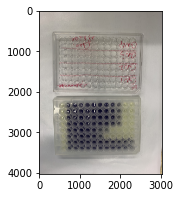

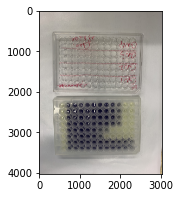

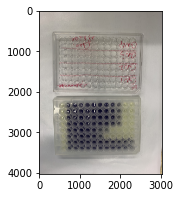

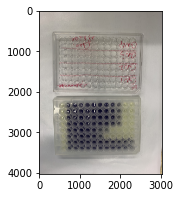

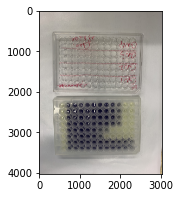

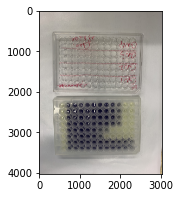

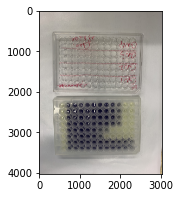

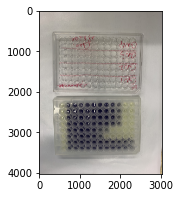

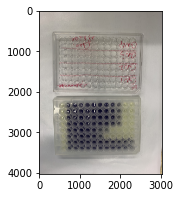

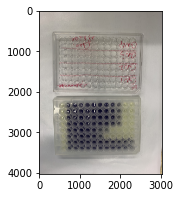

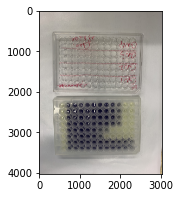

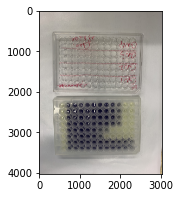

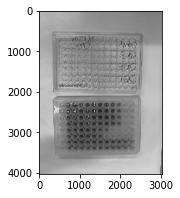

In [53]:
# Code from '11. Basic Image Processing: Filtering, scaling, thresholding', used to
# load the images and show the B channels.
# Again here, all the pictures are the same due to the issue which was previousely mentioned.
for filename in os.listdir(path):
    imageRGB = io.imread(path+filename)
    plt.imshow(imageRGB)
    image = imageRGB[:,:,2]
    print(imageRGB.shape,image.shape)
    # plotting the images
    plt.figure(figsize=(3,3))
    plt.imshow(image,cmap = 'gray')

<class 'numpy.ndarray'>
uint8
[[94.5 94.5 97.  ... 64.  61.5 63.5]
 [95.  94.5 97.  ... 64.  62.5 64. ]
 [95.  95.  97.5 ... 63.5 63.  63.5]
 ...
 [78.  76.5 77.  ... 65.  65.  64.5]
 [78.5 77.  77.5 ... 63.  62.5 61.5]
 [77.  76.5 77.5 ... 63.  61.5 60.5]] (4032, 3024) 255 0
(2016, 3024)


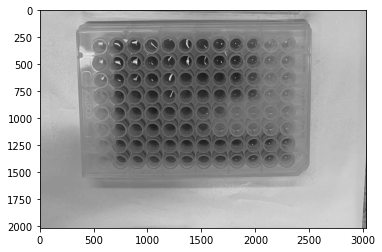

In [54]:
# Further image processing performed for one selected picture using the code from the lecture notes.
print(type(image))
print(image.dtype)
image

# As the image is a numpy array, we could to arithmetics on it, e.g.
print(image/2, image.shape,image.max(), image.min())

# We are only interested in the lower part, so let's do a crop
image = image[image.shape[0]//2:image.shape[0],:]
print(image.shape)
plt.imshow(image, cmap ='gray')
plt.show()

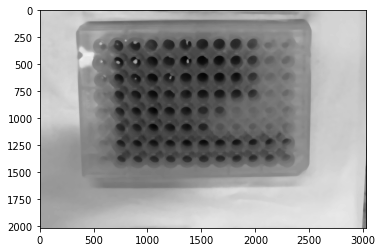

In [65]:
# Filtering
# There are some reflections or white dots in the black bins. Let's try to get rid of them with a filter.
image_mean = skf.median(image,selem=skm.disk(20))
plt.imshow(image_mean, cmap ='gray')
plt.show()

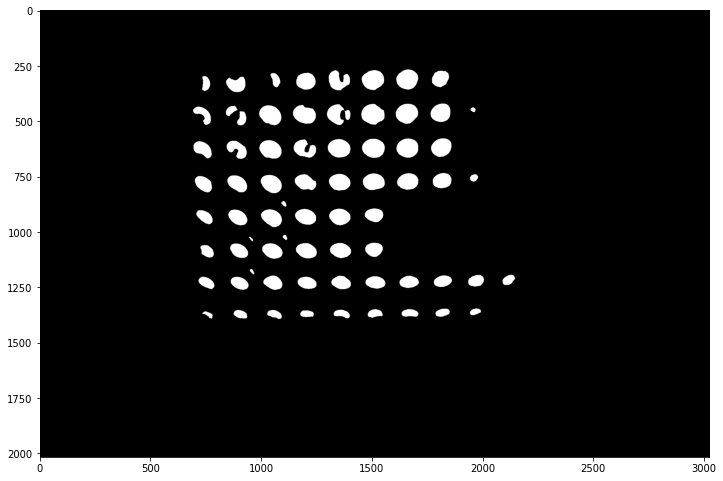

In [66]:
# Thresholding
threshold_manual = 63

#create a mask using a logical operation
image_threshold = image_mean<threshold_manual

plt.figure(figsize=(12, 12))
plt.imshow(image_threshold, cmap ='gray')
# saving the blak and white plt as a '.png' file.
plt.savefig('bw.png')
plt.show()

#### 3. Write an algorithm which counts the number of bins. First approach could be a "sliding window" algorithm, i.e a loop sliding over the image and counting regions with substantial white content. There may also be nice segmentation tools out "there" already. You may google. [about 4 hours][max 3 points]

In [117]:
# Adapted code from:
# https://stackoverflow.com/questions/48154642/how-to-count-number-of-dots-in-an-image-using-python-and-opencv

import cv2
bw = cv2.imread('bw.png',0)

## threshold
th, threshed = cv2.threshold(bw,62,255,cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)

## findcontours
cnts = cv2.findContours(threshed, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2]


## filter by area, calibration through trial and error.
s1 = 26
s2 = 1E10

xcnts = []
for cnt in cnts:
    if s1<cv2.contourArea(cnt) <s2:
        xcnts.append(cnt)

print("Dots number: {}".format(len(xcnts)))


Dots number: 68


#### 4. Write an algorithm which does the latter task on all images. As the images are quite different, this is a large task which goes beyond the time budget of this exercise, however, you can give it a try. If it works out for a couple of images, that is already good. [from 4 to 50 hours][max 3.5 points]

For the last part of this task the code used in the previous steps would require some definitely needed refinement. There are certain flaws which I could not overcome in the time I had to work on the coding task. I think it would potentially be troubelling to use the code as it is, iterated on all the files, as quite a lot of variables differ from picture to picture.